In [1]:
import os
os.chdir("../../")
from conf import *
os.chdir(ROOT_DIR)

In [6]:
from scripts.data_augmentation.pixels_change import RandomRgb2Gray2
from scripts.utilities import plot
from scripts.dataset.dataset import CityscapesDataset,classes

In [10]:
import numpy as np
import torch
from PIL import Image
from typing import Dict, Optional, Tuple, List
from torchvision import transforms

class CityscapesDataset_RandomGray(CityscapesDataset):

    def transform(self, img: Image.Image, mask: Optional[Image.Image]) -> (torch.Tensor, torch.Tensor):
        ## EXERCISE #####################################################################
        #
        # Data augmentation is a way to improve the accuracy of a model.
        #
        # Once you have a model that works, you can implement some data augmentation 
        # techniques here to further improve performance.
        #
        ##################################################################################
        #COMMENT: Flip, rotation, crop will also be done for the mask. But distorion, noising shouldn't be performed on the mask.
        T=transforms.Compose([RandomRgb2Gray2(0.9)])
        img,mask=T([img,mask])
        ################################################################################# 
        
        # Convert the image to a tensor
        img = TF.to_tensor(img)
        
        # If no mask is provided, then return only the image
        if mask is None:
            return img, None

        # Transform the mask from an image with RGB-colors to an 1-channel image with the index of the class as value
        mask_size = [s for s in self.sample_size]
        mask = torch.from_numpy(np.array(mask)).permute((2,0,1))
        target = torch.zeros((mask_size[1], mask_size[0]), dtype=torch.uint8)
        for i,c in enumerate(classes):
            eq = mask[0].eq(c.color[0]) & mask[1].eq(c.color[1]) & mask[2].eq(c.color[2])
            target += eq * i

        return img, target


In [11]:
dir_data=DATA_DIR
dir_truth = os.path.join(dir_data, "gtFine")
dir_input = os.path.join(dir_data, "leftImg8bit")

sample_size = (256, 128)
dir_truth_pp, dir_input_pp = (f'{d}_{sample_size[0]}_{sample_size[1]}' for d in (dir_truth, dir_input))
ds_split = {
    name:CityscapesDataset_RandomGray(os.path.join(dir_input_pp, name), os.path.join(dir_truth_pp, name), sample_size, classes)
    for name in ("train", "val", "test")
}
train_data=ds_split["train"]
img_temp=train_data.load_input(train_data.items[0])
truth_temp=train_data.load_truth(train_data.items[0])

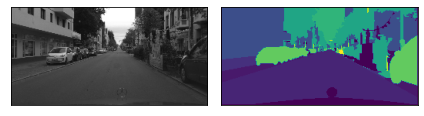

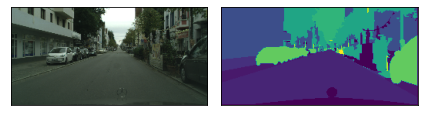

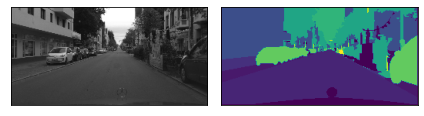

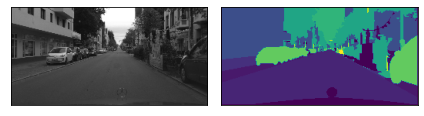

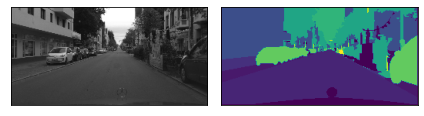

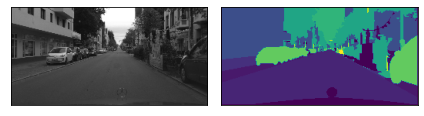

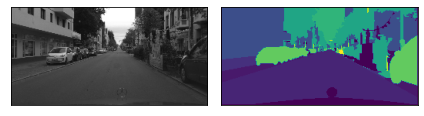

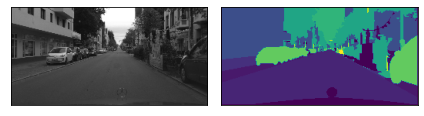

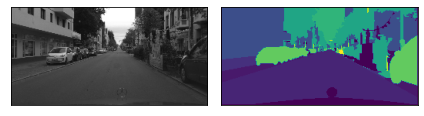

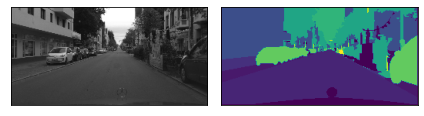

In [12]:
for i in range(10):
    res=ds_split["train"][0]
    plot([TF.to_pil_image(res[0]),TF.to_pil_image(res[1])])